In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import csv,sys
import math,random
import subprocess
from sklearn.metrics import roc_curve
from sklearn.svm import OneClassSVM
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from scipy.optimize import brentq
from scipy.interpolate import interp1d
from sklearn.metrics import accuracy_score, roc_curve, auc

plt.style.use('ggplot')
%matplotlib inline


In [4]:
data = pd.read_csv("DSL-StrongPasswordData.csv")
subjects = data["subject"].unique()
data.head()

,subject,sessionIndex,rep,H.period,DD.period.t,UD.period.t,H.t,DD.t.i,UD.t.i,H.i,DD.i.e,UD.i.e,H.e,DD.e.five,UD.e.five,H.five,DD.five.Shift.r,UD.five.Shift.r,H.Shift.r,DD.Shift.r.o,UD.Shift.r.o,H.o,DD.o.a,UD.o.a,H.a,DD.a.n,UD.a.n,H.n,DD.n.l,UD.n.l,H.l,DD.l.Return,UD.l.Return,H.Return
0,s002,1,1,0.1491,0.3979,0.2488,0.1069,0.1674,0.0605,0.1169,0.2212,0.1043,0.1417,1.1885,1.0468,0.1146,1.6055,1.4909,0.1067,0.7590,0.6523,0.1016,0.2136,0.1120,0.1349,0.1484,0.0135,0.0932,0.3515,0.2583,0.1338,0.3509,0.2171,0.0742
1,s002,1,2,0.1111,0.3451,0.2340,0.0694,0.1283,0.0589,0.0908,0.1357,0.0449,0.0829,1.1970,1.1141,0.0689,0.7822,0.7133,0.1570,0.7877,0.6307,0.1066,0.1684,0.0618,0.1412,0.2558,0.1146,0.1146,0.2642,0.1496,0.0839,0.2756,0.1917,0.0747
2,s002,1,3,0.1328,0.2072,0.0744,0.0731,0.1291,0.0560,0.0821,0.1542,0.0721,0.0808,1.0408,0.9600,0.0892,0.6203,0.5311,0.1454,0.7195,0.5741,0.1365,0.2931,0.1566,0.1621,0.2332,0.0711,0.1172,0.2705,0.1533,0.1085,0.2847,0.1762,0.0945
3,s002,1,4,0.1291,0.2515,0.1224,0.1059,0.2495,0.1436,0.1040,0.2038,0.0998,0.0900,1.0556,0.9656,0.0913,1.2564,1.1651,0.1454,0.7550,0.6096,0.0956,0.1530,0.0574,0.1457,0.1629,0.0172,0.0866,0.2341,0.1475,0.0845,0.3232,0.2387,0.0813
4,s002,1,5,0.1249,0.2317,0.1068,0.0895,0.1676,0.0781,0.0903,0.1589,0.0686,0.0805,0.8629,0.7824,0.0742,0.8955,0.8213,0.1243,0.7632,0.6389,0.0430,0.1975,0.1545,0.1312,0.1582,0.0270,0.0884,0.2517,0.1633,0.0903,0.2517,0.1614,0.0818


In [29]:
def evaluateEER(user_scores, imposter_scores, subject):
    #print user_scores
    labels = [0]*len(user_scores) + [1]*len(imposter_scores)
    fpr, tpr, thresholds = roc_curve(labels, user_scores + imposter_scores)

    missrates = 1 - tpr
    farates = fpr
    dists = missrates - farates
    idx1 = np.argmin(dists[dists >= 0])
    idx2 = np.argmax(dists[dists < 0])
    x = [missrates[idx1], farates[idx1]]
    y = [missrates[idx2], farates[idx2]]
    a = ( x[0] - x[1] ) / ( y[1] - x[1] - y[0] + x[0] )
    eer = x[0] + a * ( y[0] - x[0] )

    plt.figure(figsize = (10,5))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, color = 'magenta',label='AUC = {:.3f}, EER = {:.3f} One Class SVM'.format(auc(fpr, tpr), eer))
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title(f'ROC curve for {subject}')
    plt.legend(loc='best')
    plt.show()
    print("One Class distance shows error rates ", eer)

    return eer

In [30]:
def evaluate():
    eers = []
    for subject in subjects:
            
        user_scores = []
        imposter_scores = []
    
        # Consider current subject as genuine and rest as imposters
        genuine_user_data = data.loc[data.subject == subject, "H.period":"H.Return"]
        imposter_data = data.loc[data.subject != subject, :]
    
        # genuine user's first 200 time vectors for training
        train = genuine_user_data[:200]
        train = train.values
        train = np.array(train)
        #labels = np.ones(len(train),dtype = np.float64)
        #print type(labels[0])
        test_genuine = genuine_user_data[200:]
        test_genuine = test_genuine.values
        test_genuine = np.array(test_genuine)
        test_imposter = imposter_data.groupby("subject").head(5).loc[:, "H.period":"H.Return"]
        test_imposter = test_imposter.values
        test_imposter = np.array(test_imposter)
        clf = OneClassSVM(kernel='rbf',gamma=26)
        clf.fit(train)
        #print len(test_genuine)
        #print len(test_imposter)
        user_scores = -clf.decision_function(test_genuine)
        imposter_scores = -clf.decision_function(test_imposter)
        user_scores = list(user_scores)
        imposter_scores = list(imposter_scores)
        eers.append(evaluateEER(user_scores, imposter_scores, subject))
    #print eers   
    return np.mean(eers), np.std(eers)

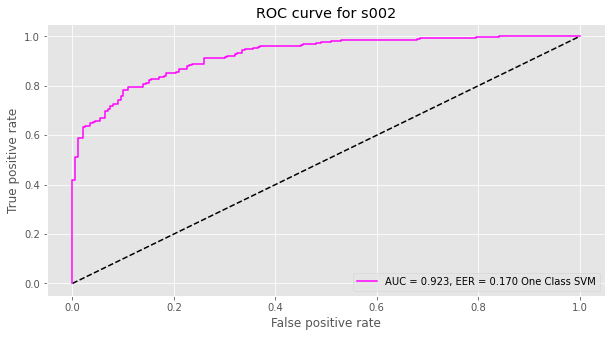

One Class distance shows error rates  0.17034068136272545


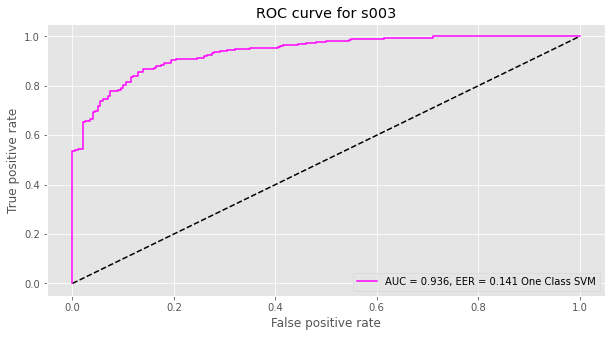

One Class distance shows error rates  0.14056224899598396


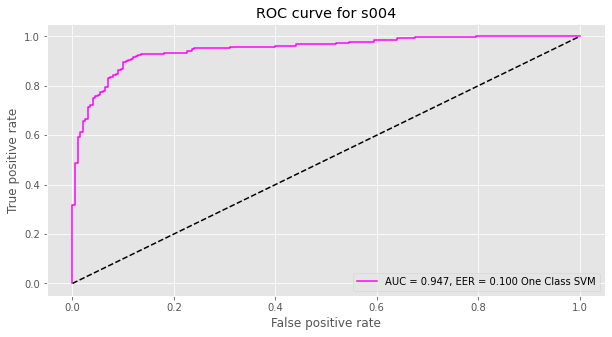

One Class distance shows error rates  0.10040160642570281


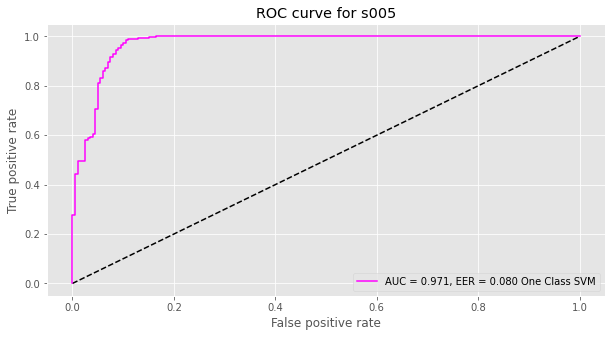

One Class distance shows error rates  0.08032128514056225


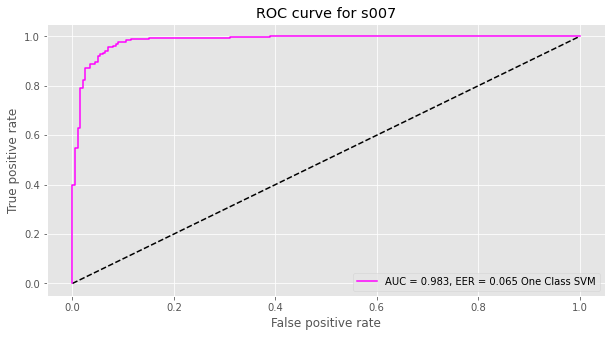

One Class distance shows error rates  0.06519558676028084


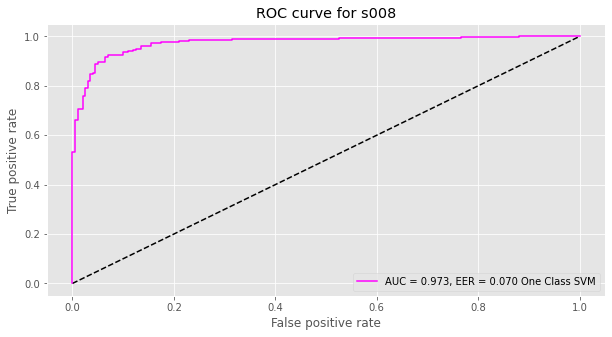

One Class distance shows error rates  0.07042253521126761


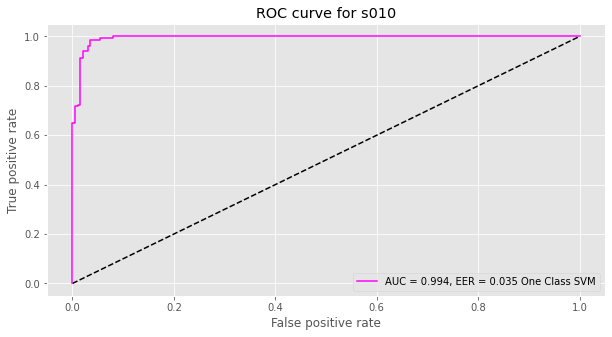

One Class distance shows error rates  0.03517587939698493


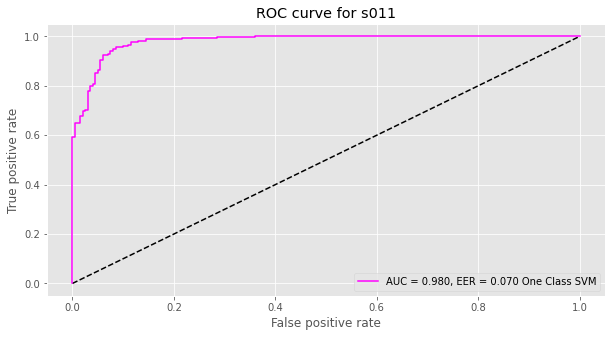

One Class distance shows error rates  0.07014028056112225


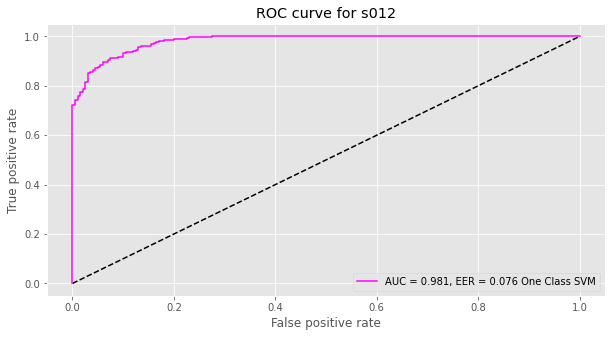

One Class distance shows error rates  0.07598784194528875


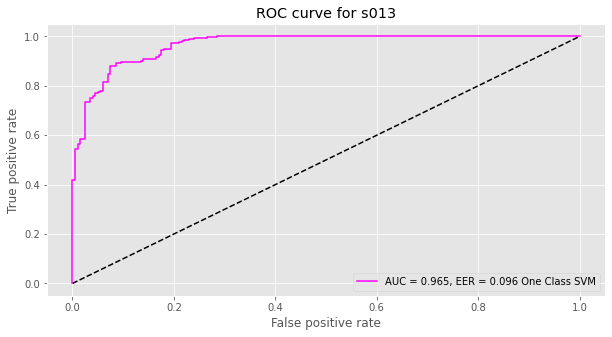

One Class distance shows error rates  0.09586276488395559


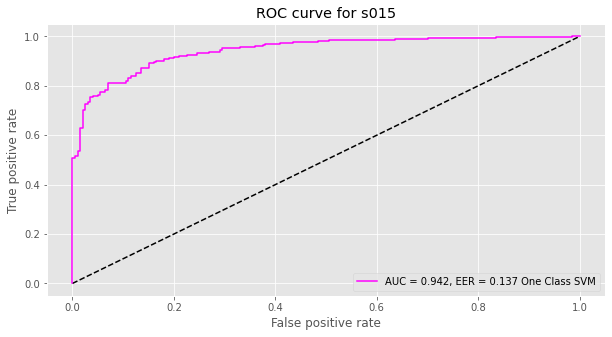

One Class distance shows error rates  0.13677811550151978


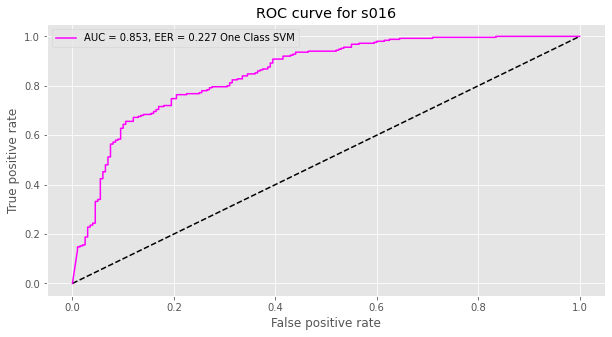

One Class distance shows error rates  0.22658610271903323


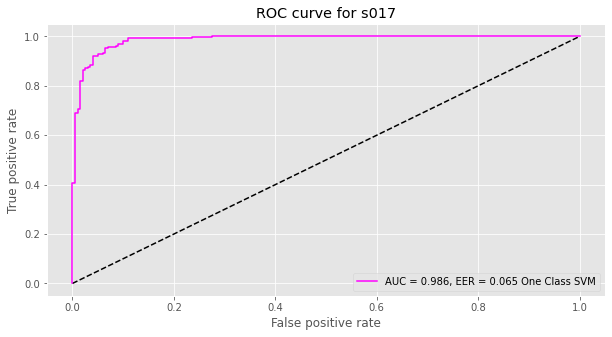

One Class distance shows error rates  0.06519558676028084


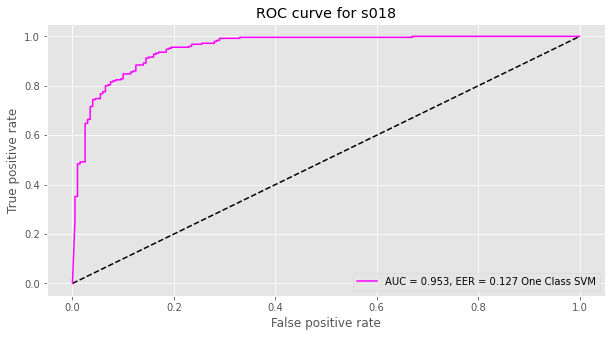

One Class distance shows error rates  0.12690355329949238


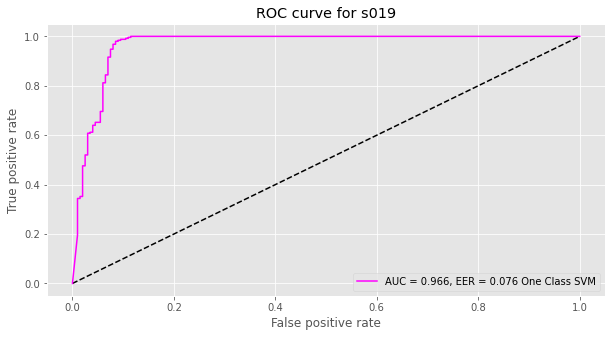

One Class distance shows error rates  0.07568113017154389


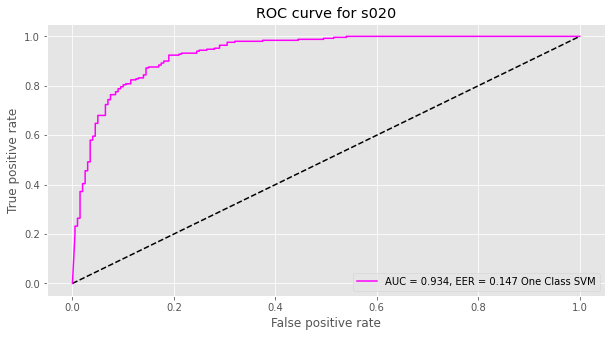

One Class distance shows error rates  0.14661274014155712


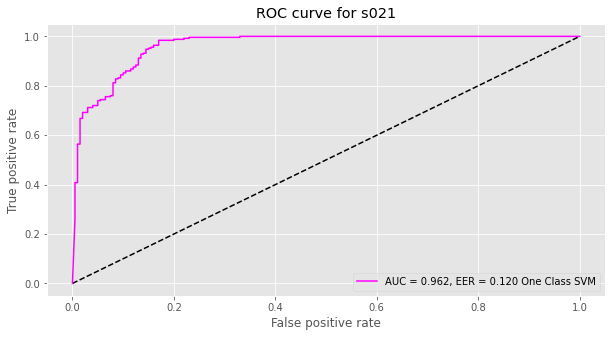

One Class distance shows error rates  0.12048192771084337


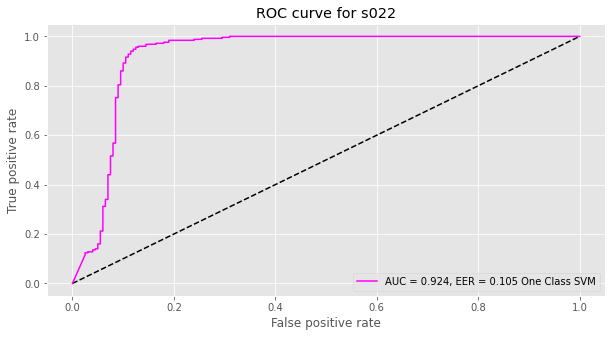

One Class distance shows error rates  0.10531594784353059


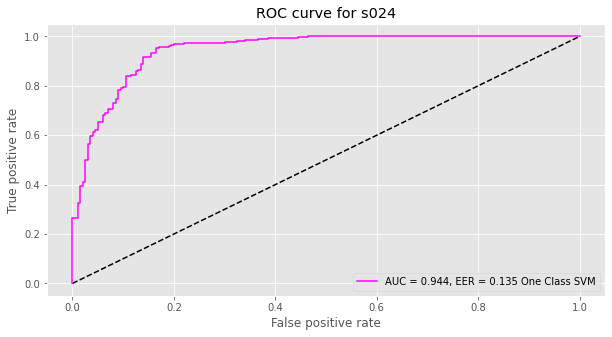

One Class distance shows error rates  0.13513513513513514


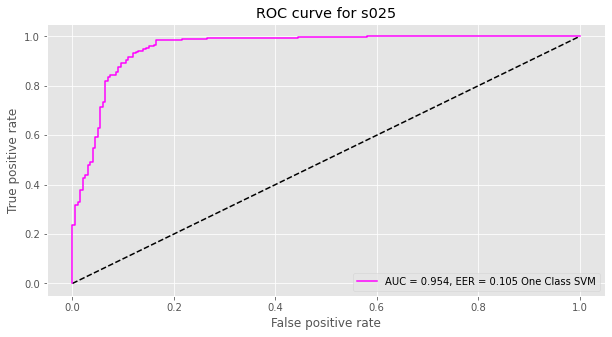

One Class distance shows error rates  0.10531594784353059


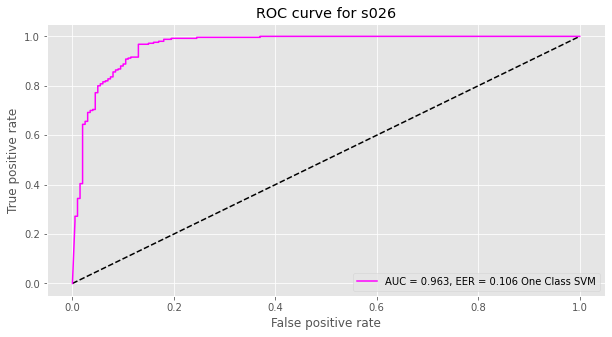

One Class distance shows error rates  0.10574018126888217


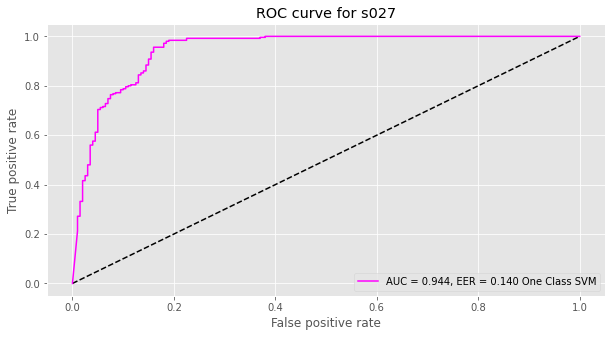

One Class distance shows error rates  0.14


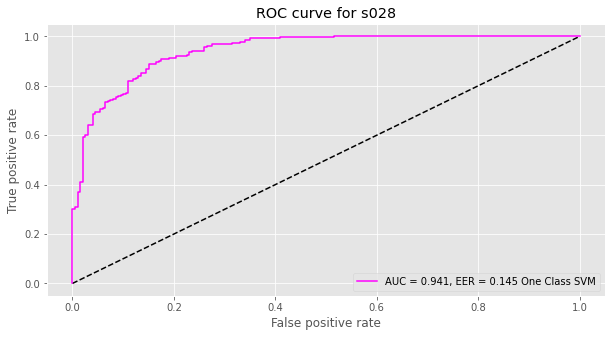

One Class distance shows error rates  0.14543630892678033


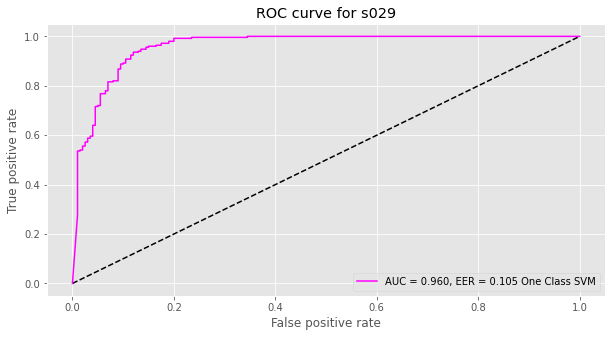

One Class distance shows error rates  0.10531594784353059


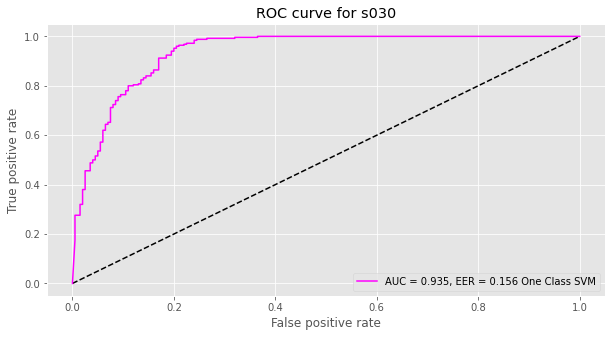

One Class distance shows error rates  0.15577889447236182


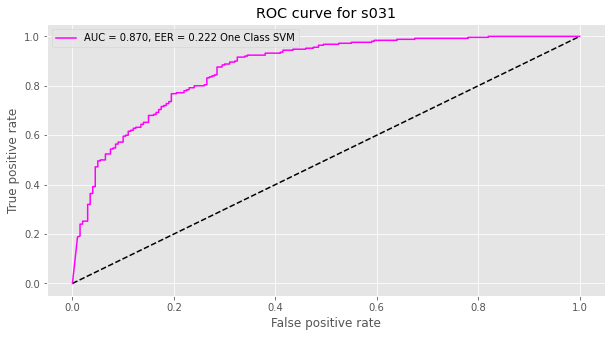

One Class distance shows error rates  0.2217741935483871


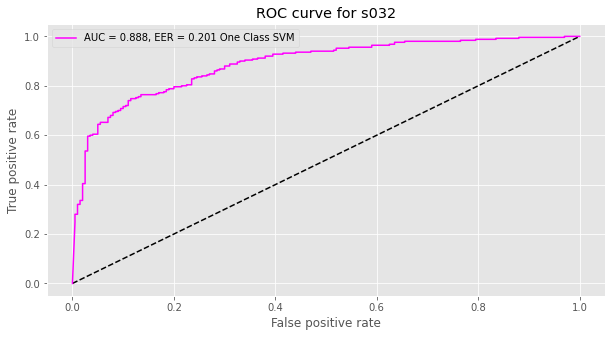

One Class distance shows error rates  0.20080321285140562


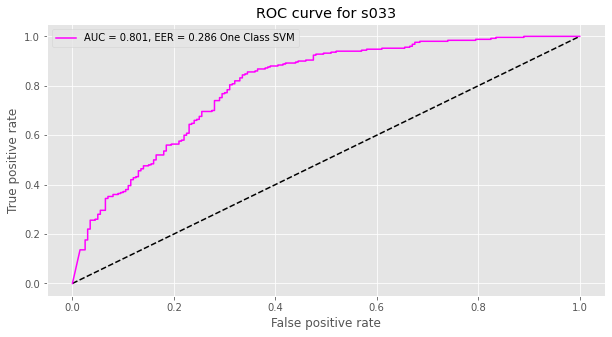

One Class distance shows error rates  0.28571428571428575


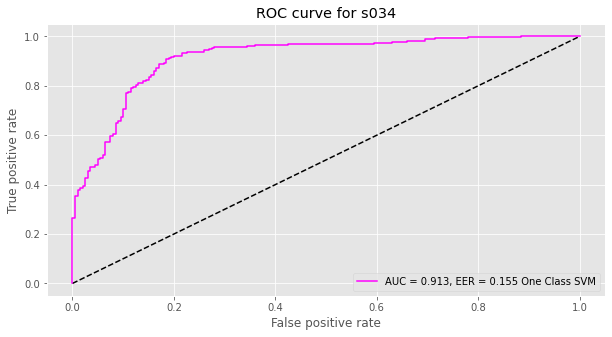

One Class distance shows error rates  0.15515515515515516


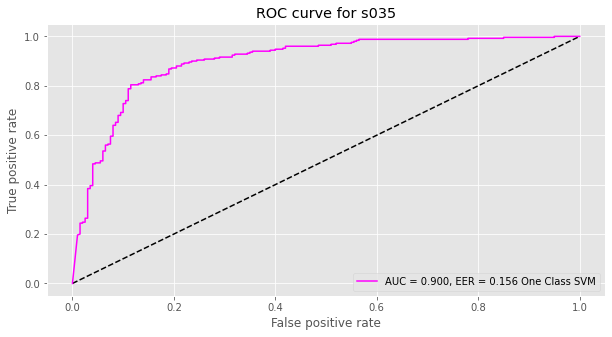

One Class distance shows error rates  0.15640766902119072


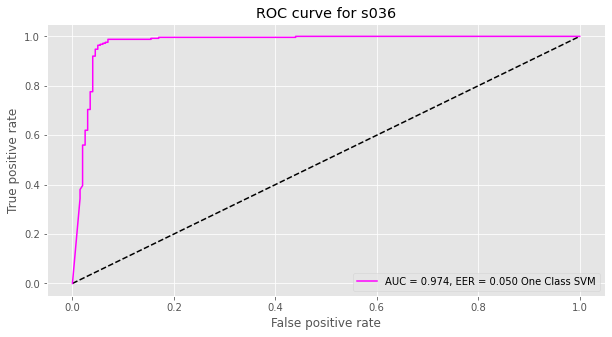

One Class distance shows error rates  0.05010020040080161


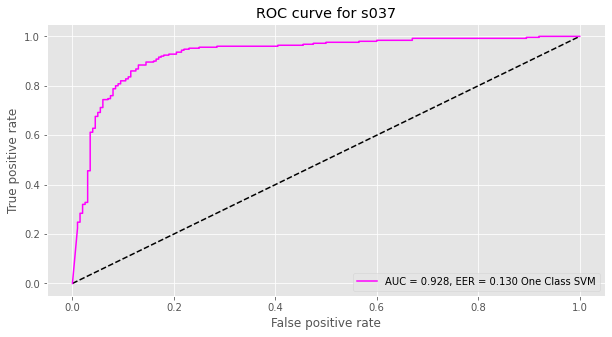

One Class distance shows error rates  0.13026052104208416


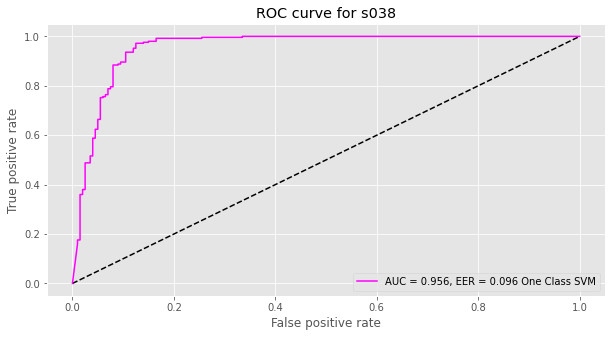

One Class distance shows error rates  0.09586276488395559


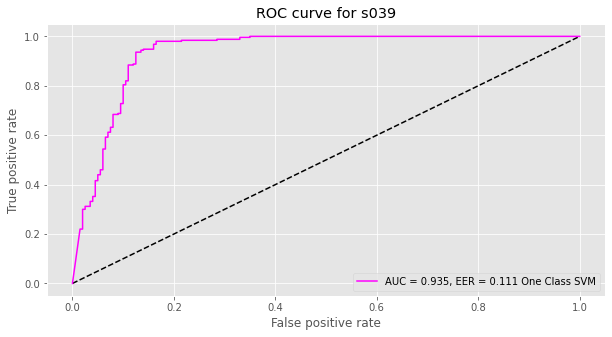

One Class distance shows error rates  0.11066398390342053


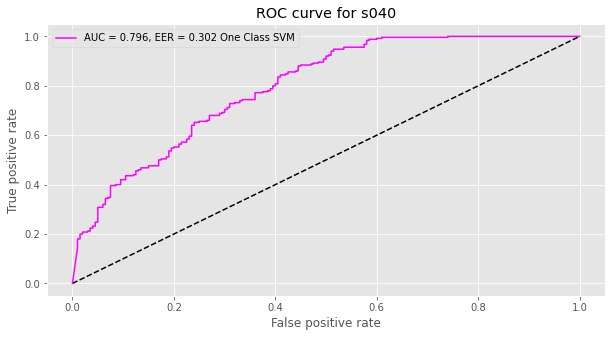

One Class distance shows error rates  0.3024193548387097


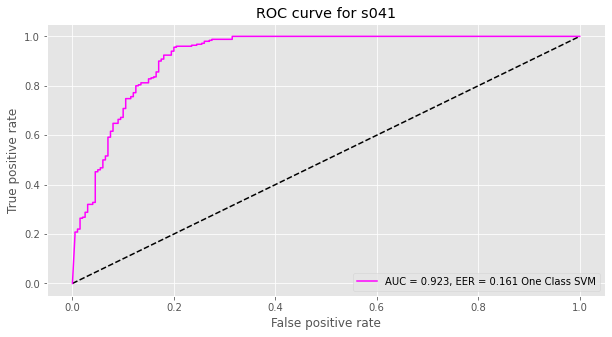

One Class distance shows error rates  0.1606425702811245


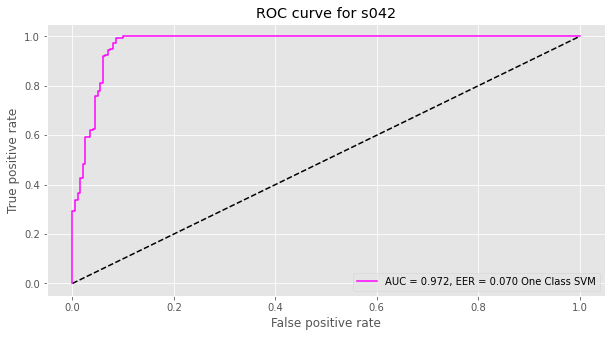

One Class distance shows error rates  0.07042253521126761


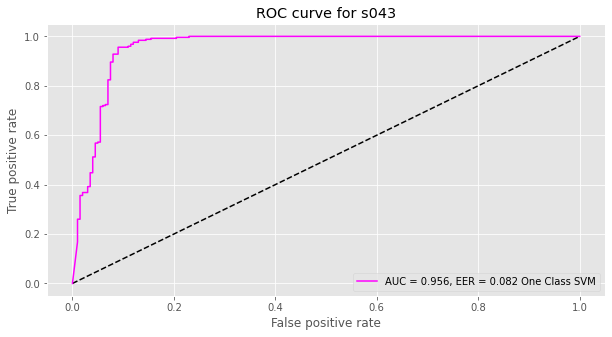

One Class distance shows error rates  0.0819672131147541


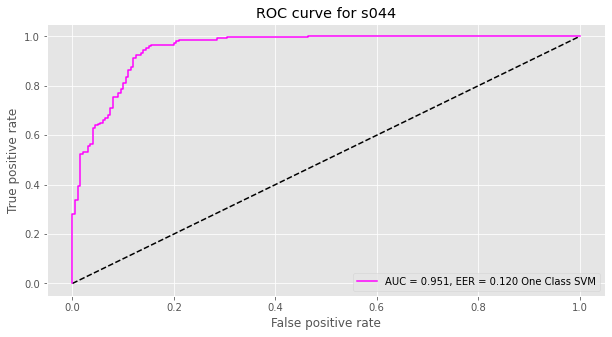

One Class distance shows error rates  0.12048192771084337


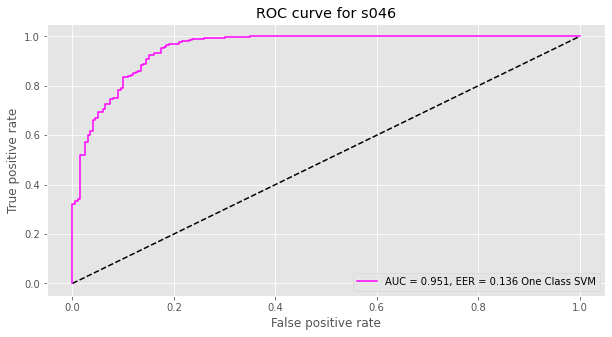

One Class distance shows error rates  0.135678391959799


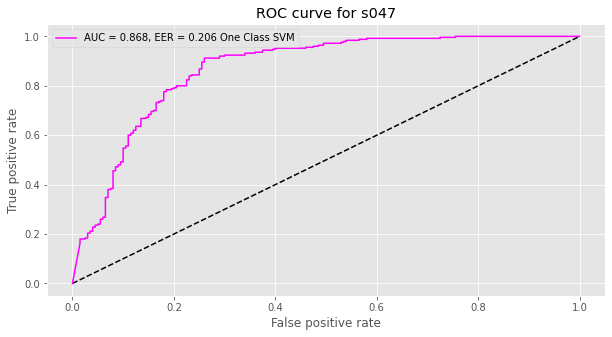

One Class distance shows error rates  0.20561685055165496


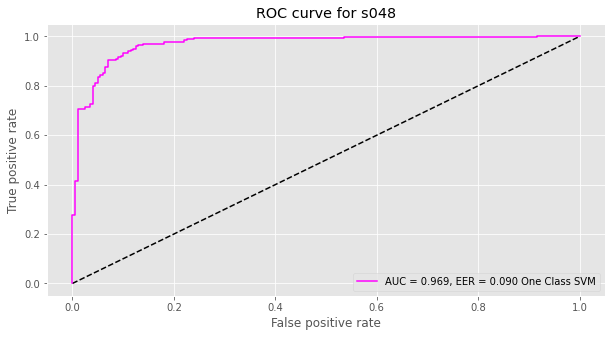

One Class distance shows error rates  0.09018036072144288


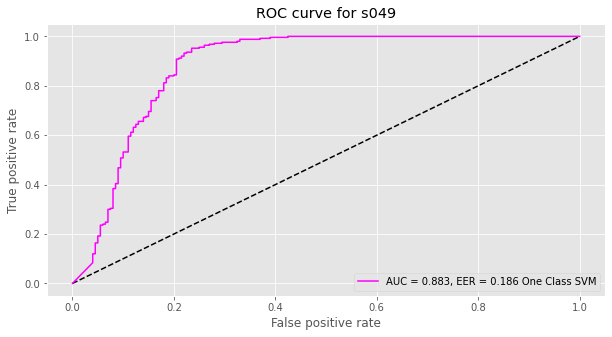

One Class distance shows error rates  0.18555667001003007


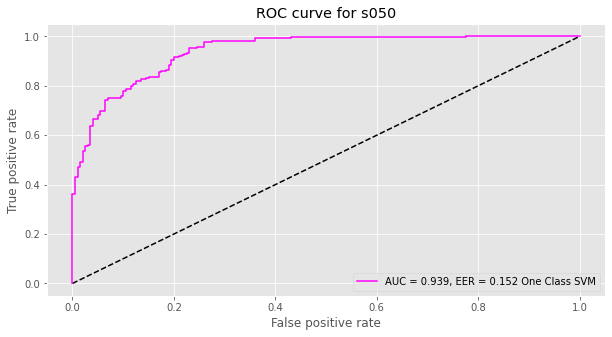

One Class distance shows error rates  0.15212981744421908


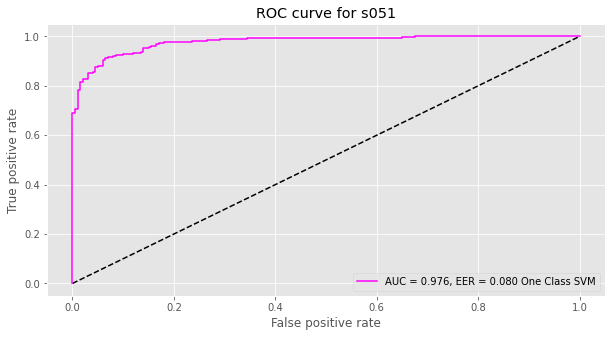

One Class distance shows error rates  0.08032128514056225


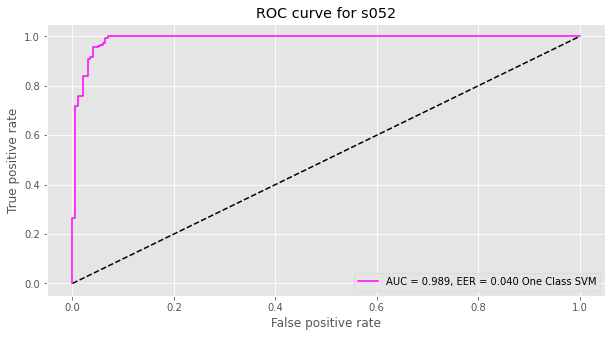

One Class distance shows error rates  0.040160642570281124


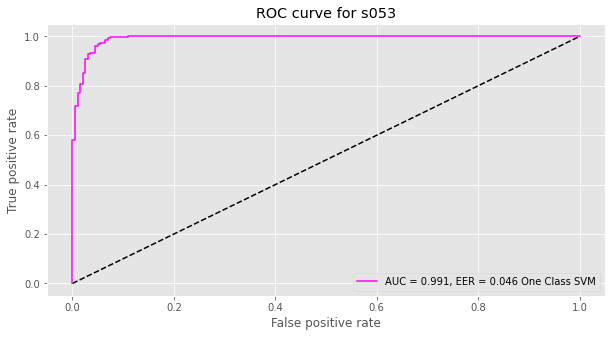

One Class distance shows error rates  0.04605936540429886


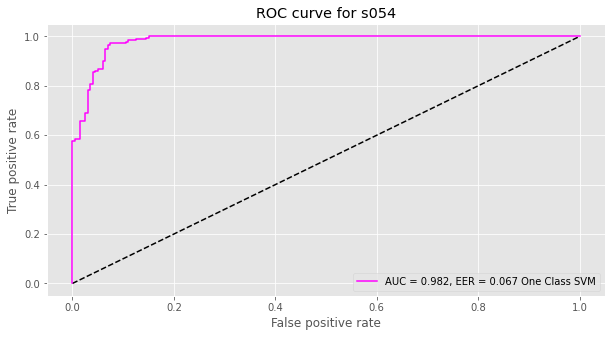

One Class distance shows error rates  0.06735751295336787


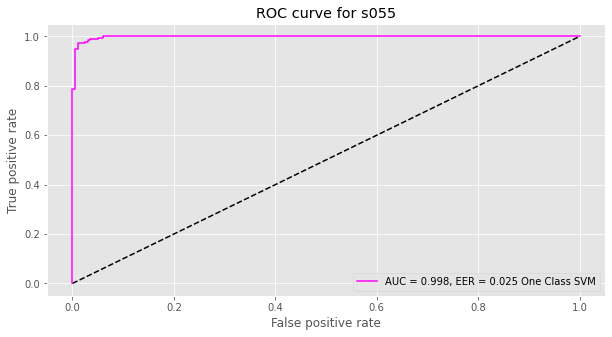

One Class distance shows error rates  0.025075225677031094


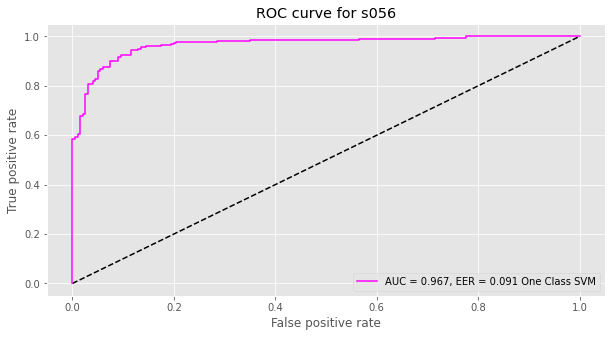

One Class distance shows error rates  0.09090909090909091


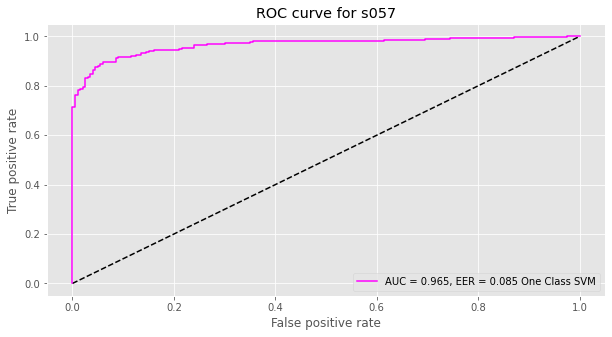

One Class distance shows error rates  0.08525576730190572


(0.12054244703221502, 0.058709278630758664)

In [31]:
evaluate() 